In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from mpl_toolkits.basemap import Basemap
import folium
import folium.plugins
from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')
from scipy.misc import imread
import codecs
from subprocess import check_output

In [53]:
terror=pd.read_csv('globalterrorismdb_0718dist0.csv',encoding='ISO-8859-1')
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
#terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror['casualities']=terror['Killed']+terror['Wounded']
terror.head(3)

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,casualities
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,1.0
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,PGIS,0,1,1,1,NaN,0.0
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,1.0


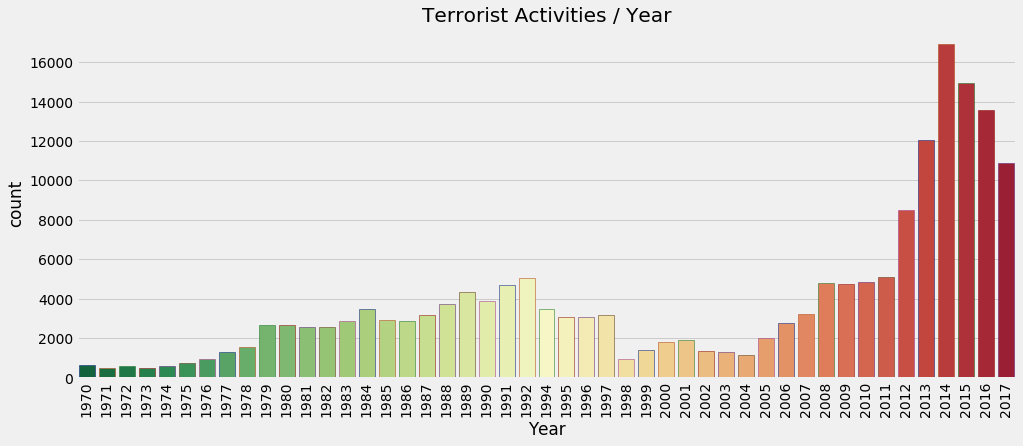

In [54]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Terrorist Activities / Year')
plt.show()

In [76]:
print(terror.columns.values)

['Year' 'Month' 'Day' 'approxdate' 'resolution' 'country' 'Country'
 'region' 'Region' 'provstate' 'city' 'latitude' 'longitude' 'vicinity'
 'location' 'crit1' 'crit2' 'crit3' 'doubtterr' 'alternative'
 'alternative_txt' 'multiple' 'success' 'suicide' 'attacktype1'
 'AttackType' 'attacktype2' 'attacktype2_txt' 'attacktype3'
 'attacktype3_txt' 'targtype1' 'Target_type' 'targsubtype1'
 'targsubtype1_txt' 'corp1' 'Target' 'natlty1' 'natlty1_txt' 'targtype2'
 'targtype2_txt' 'targsubtype2' 'targsubtype2_txt' 'corp2' 'target2'
 'natlty2' 'natlty2_txt' 'targtype3' 'targtype3_txt' 'targsubtype3'
 'targsubtype3_txt' 'corp3' 'target3' 'natlty3' 'natlty3_txt' 'gsubname'
 'gname2' 'gsubname2' 'gname3' 'gsubname3' 'guncertain1' 'guncertain2'
 'guncertain3' 'individual' 'nperps' 'nperpcap' 'claimed' 'claimmode'
 'claimmode_txt' 'claim2' 'claimmode2' 'claimmode2_txt' 'claim3'
 'claimmode3' 'claimmode3_txt' 'compclaim' 'weaptype1' 'weapsubtype1'
 'weapsubtype1_txt' 'weaptype2' 'weaptype2_txt' 'weapsu

In [56]:
print(terror.describe())

            eventid           Year          Month            Day  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002705e+11    2002.638997       6.467277      15.505644   
std    1.325957e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991021e+11    1991.000000       4.000000       8.000000   
50%    2.009022e+11    2009.000000       6.000000      15.000000   
75%    2.014081e+11    2014.000000       9.000000      23.000000   
max    2.017123e+11    2017.000000      12.000000      31.000000   

            extended        country         region       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean        0.045346     131.968501       7.160938      23.498343   
std         0.208063     112.414535       2.933408      18.569242   
min         0.000000       4.000000       1.000000     -53.154613   
25%         0.000000      78.000000       

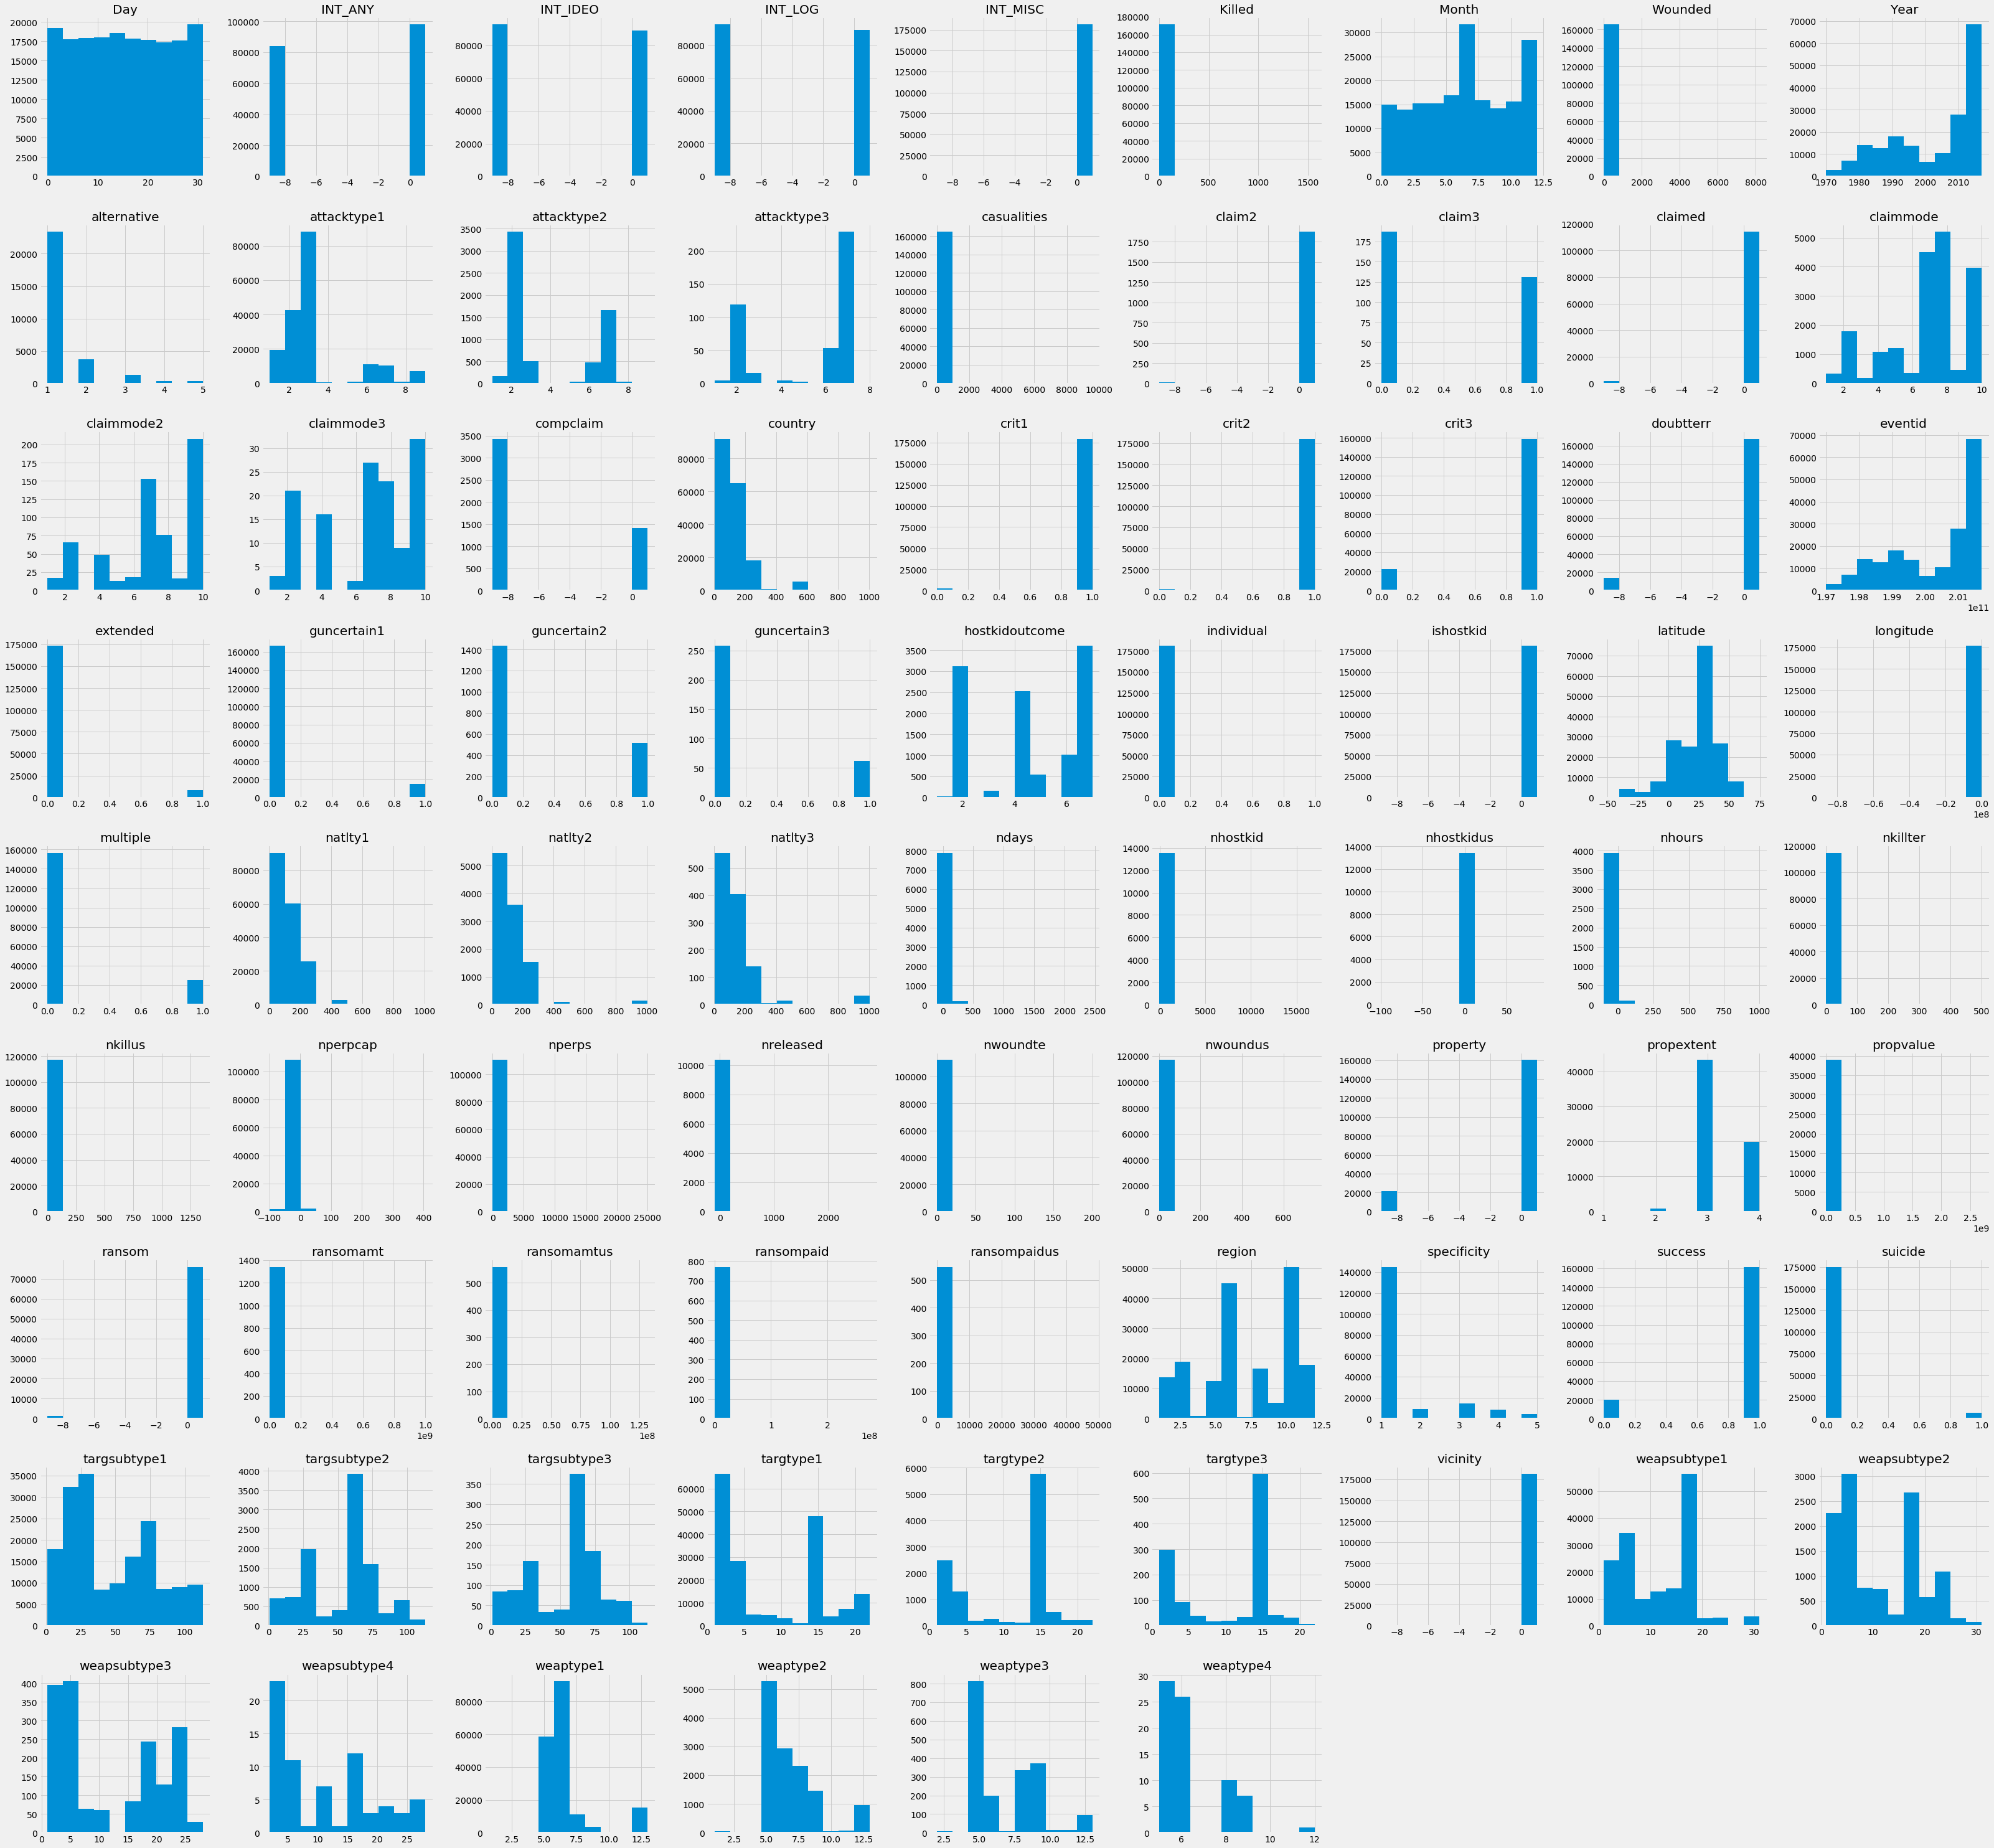

In [57]:
terror.hist(figsize = (50,50))
plt.show()

In [74]:
#month 6 and month 12 shows a spike,
#sharp rise after 2000
terror = terror.drop(columns = ['hostkidoutcome', 'hostkidoutcome_txt'])

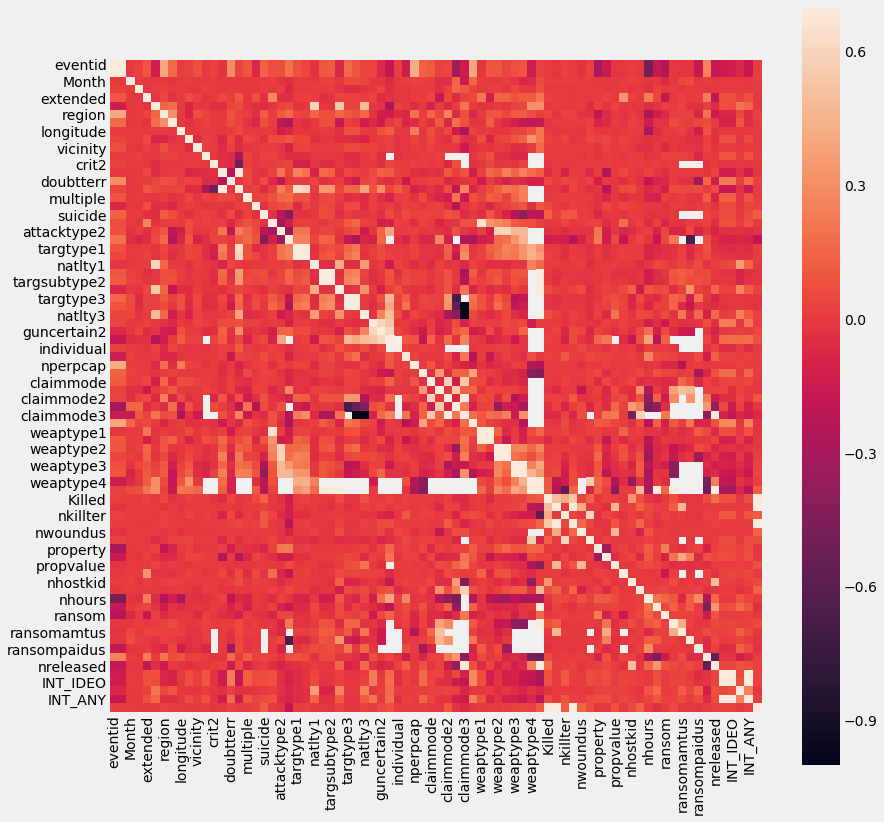

In [60]:

cor_m= terror.corr()
fig=plt.figure(figsize=(13,13))
sns.heatmap(cor_m, vmax = 0.7 , square=True)
plt.show()